<a href="https://colab.research.google.com/github/pranjaliborse2/pranjaliborse2/blob/main/CV_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
100% 586M/587M [00:20<00:00, 30.3MB/s]
100% 587M/587M [00:20<00:00, 30.0MB/s]


In [ ]:
!unzip /content/weather-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [ ]:

import numpy as np
import pandas as pd
import os
import cv2 #OpenCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dew_path = "/content/dataset/dew"
sand_path ="/content/dataset/sandstorm"
snow_path = "/content/dataset/snow"

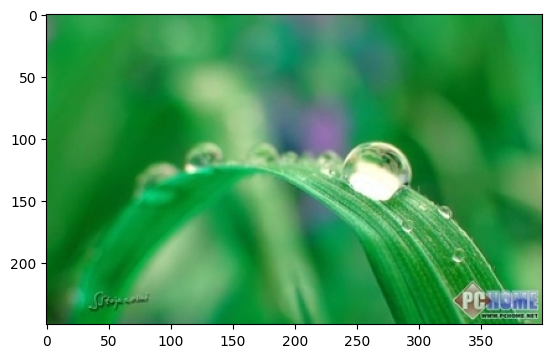

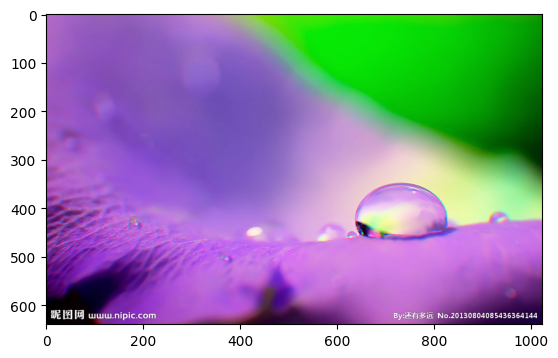

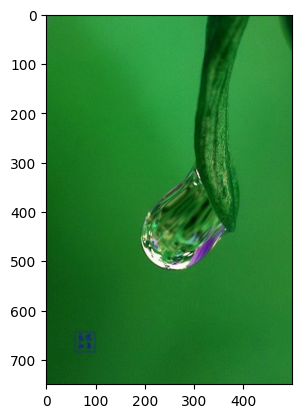

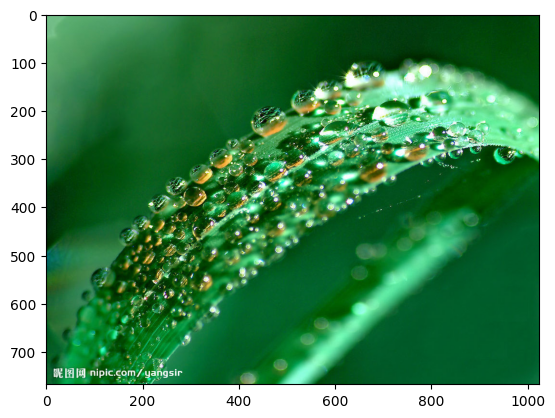

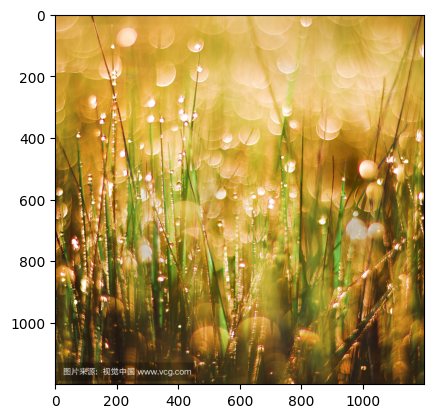

In [ ]:
#Dew Images
for img in os.listdir(dew_path)[:5]:
  img_array = cv2.imread(os.path.join(dew_path,img))
  plt.imshow(img_array)
  plt.show()

In [ ]:
data = []
IMG_SIZE = 300

def get_data(file_path,class_num, data):
    for img in os.listdir(file_path):
        try:
            img_array = cv2.imread(os.path.join(file_path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
        except:
            pass
get_data(dew_path,0,data)
get_data(sand_path,1,data)
get_data(snow_path,2,data)

In [ ]:
random.shuffle(data)

In [ ]:

X = []
y = []
for i in data:
    X.append(i[0])
    y.append(i[1])


In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,3)
y = np.array(y)


In [ ]:
y

array([0, 2, 0, ..., 1, 1, 2])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(1608, 300, 300, 3)
(201, 300, 300, 3)
(201, 300, 300, 3)


In [ ]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization
from tensorflow.python.keras.utils import np_utils

In [ ]:
# one-hot format classes

nb_classes = 3 # number of unique digits

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=180, width_shift_range=0.1,
                         height_shift_range=0.1)

# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, y_train)

In [ ]:
model = models.Sequential([

  layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 300, 300, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 150, 150, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
51/51 [==============================] - 37s 631ms/step - loss: 0.5224 - accuracy: 0.7985 - val_loss: 0.4037 - val_accuracy: 0.8706
Epoch 2/15
51/51 [==============================] - 34s 676ms/step - loss: 0.2942 - accuracy: 0.9067 - val_loss: 0.3653 - val_accuracy: 0.8557
Epoch 3/15
51/51 [==============================] - 33s 642ms/step - loss: 0.2840 - accuracy: 0.9204 - val_loss: 0.4717 - val_accuracy: 0.7960
Epoch 4/15
51/51 [==============================] - 34s 674ms/step - loss: 0.2313 - accuracy: 0.9291 - val_loss: 0.2008 - val_accuracy: 0.9502
Epoch 5/15
51/51 [==============================] - 33s 650ms/step - loss: 0.2031 - accuracy: 0.9366 - val_loss: 0.1575 - val_accuracy: 0.9552
Epoch 6/15
51/51 [==============================] - 34s 663ms/step - loss: 0.1934 - accuracy: 0.9403 - val_loss: 0.1713 - val_accuracy: 0.9453
Epoch 7/15
51/51 [==============================] - 33s 646ms/step - loss: 0.2197 - accuracy: 0.9316 - val_loss: 0.3039 - val_accuracy: 0.8905

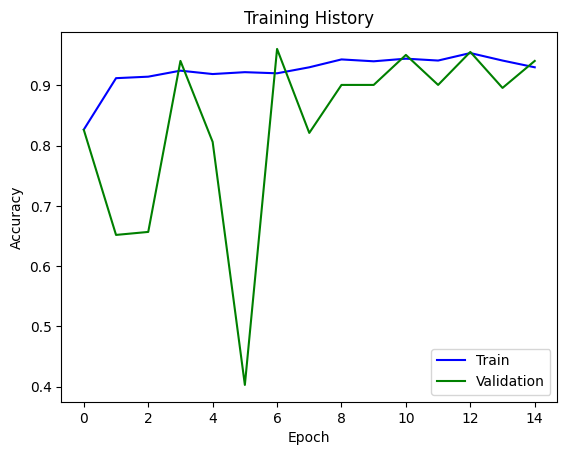

In [ ]:
#visualize the training vs the validation accuracy of the model
plt.plot(history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 30ms/step - loss: 0.3487 - accuracy: 0.9055


[0.3486626446247101, 0.9054726362228394]

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 31ms/step


In [ ]:
class_labels = np.argmax(y_test, axis=1)

In [ ]:
class_labels

array([2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1,
       2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0,
       2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       2, 0, 0])

<Axes: >

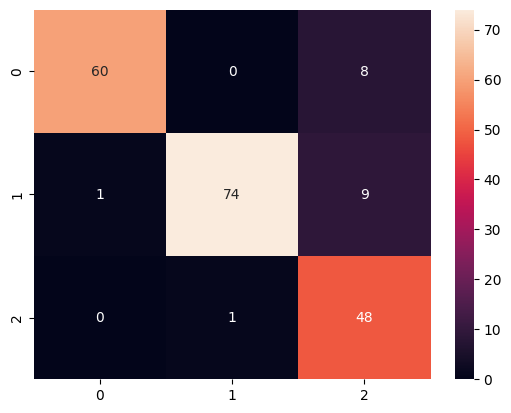

In [ ]:
cm = tf.math.confusion_matrix(labels=class_labels, predictions=np.argmax( predictions, axis=1))
sns.heatmap(cm,annot=True, fmt='d')


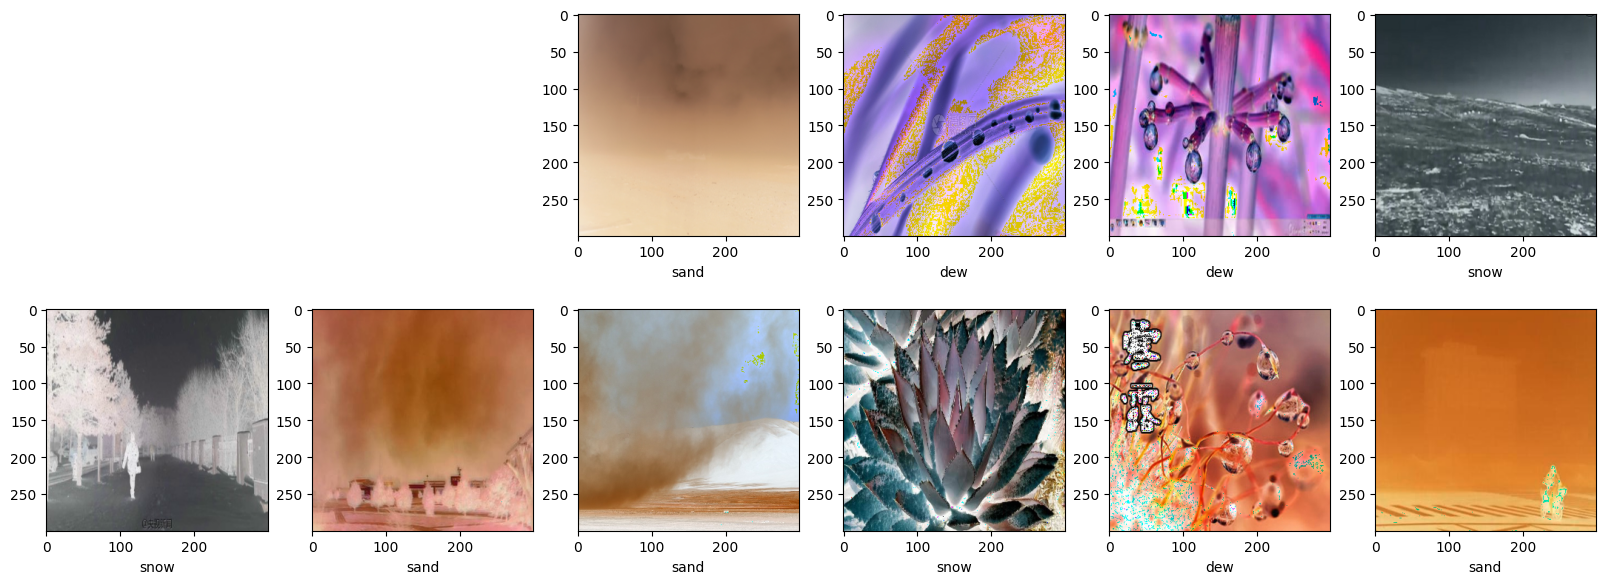

In [ ]:

plt.figure(figsize=(20,30))

cat = ["dew", "sand","snow"]

for i in range(20,30):
    plt.subplot(8,6,i+1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))
    plt.xlabel(cat[np.argmax(predictions, axis=1)[i]])

Next steps - Apply data augmentation, insert layers of convolution - use batch normalization, don't use max_pooling in every layer